In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error  # or accuracy_score, etc.
import lightgbm as lgb

from src.data import DataLoader
from src.evaluate import evaluate
from src.preprocessing import PreProcessClass

In [2]:
# sys.path.append(str(Path("Alpiq ETHdatathon challenge 2025").resolve()))
input_path = "datasets2025/"
loader = DataLoader(input_path)

**Italy preprocessing**

In [4]:
consumptions, features, example_solution = loader.load_data("IT")
preprocessor_it = PreProcessClass(x=consumptions, features=features)

col_customersIT = [
    id
    for id in consumptions.columns
    if id.startswith("VALUEMWHMETERINGDATA_customerIT")
]
dataIT = preprocessor_it.preprocess_nonan(col_customersIT)

dataIT
# dataIT = dataIT.reset_index()
# dataIT = dataIT.rename(columns={"index": "DateTime"})
# dataIT.head()

Processing consumers: 100%|██████████| 1698/1698 [05:20<00:00,  5.30it/s]


,VALUEMWHMETERINGDATA_customerIT_1,VALUEMWHMETERINGDATA_customerIT_2,VALUEMWHMETERINGDATA_customerIT_3,VALUEMWHMETERINGDATA_customerIT_4,VALUEMWHMETERINGDATA_customerIT_5,VALUEMWHMETERINGDATA_customerIT_6,VALUEMWHMETERINGDATA_customerIT_7,VALUEMWHMETERINGDATA_customerIT_8,VALUEMWHMETERINGDATA_customerIT_13,VALUEMWHMETERINGDATA_customerIT_14,...,Month,Year,Dow,IsWeekend,hour_sin,hour_cos,dow_sin,dow_cos,month_sin,month_cos
2022-01-01 00:00:00,0.001547,0.002346,0.114639,0.247488,0.005892,0.061939,0.003835,0.032999,0.003300,0.003414,...,1,2022,5,1,0.000000,1.000000,-0.974928,-0.222521,0.500000,0.866025
2022-01-01 01:00:00,0.001617,0.001291,0.109093,0.215099,0.000734,0.057222,0.003480,0.076501,0.003150,0.003108,...,1,2022,5,1,0.258819,0.965926,-0.974928,-0.222521,0.500000,0.866025
2022-01-01 02:00:00,0.001490,0.001480,0.105637,0.219556,0.000693,0.071429,0.003410,0.129450,0.003150,0.003427,...,1,2022,5,1,0.500000,0.866025,-0.974928,-0.222521,0.500000,0.866025
2022-01-01 03:00:00,0.000798,0.002317,0.105733,0.212614,0.002068,0.064760,0.003466,0.074399,0.003300,0.003553,...,1,2022,5,1,0.707107,0.707107,-0.974928,-0.222521,0.500000,0.866025
2022-01-01 04:00:00,0.000592,0.002071,0.103188,0.205782,0.001283,0.071744,0.003508,0.054900,0.003150,0.003834,...,1,2022,5,1,0.866025,0.500000,-0.974928,-0.222521,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31 19:00:00,-0.007566,0.011662,0.067983,0.118799,0.015884,0.124294,0.020823,0.007662,0.003593,0.002929,...,8,2024,5,1,-0.965926,0.258819,-0.974928,-0.222521,-0.866025,-0.500000
2024-08-31 20:00:00,-0.005132,0.005359,0.067018,0.131206,0.006718,0.143024,0.021507,0.013574,0.004396,0.003623,...,8,2024,5,1,-0.866025,0.500000,-0.974928,-0.222521,-0.866025,-0.500000
2024-08-31 21:00:00,-0.002948,0.003517,0.072626,0.135925,0.003386,0.148560,0.021462,0.018165,0.004509,0.003155,...,8,2024,5,1,-0.707107,0.707107,-0.974928,-0.222521,-0.866025,-0.500000
2024-08-31 22:00:00,-0.002382,0.002393,0.079084,0.134102,0.002431,0.139980,0.020773,0.019858,0.004128,0.003134,...,8,2024,5,1,-0.500000,0.866025,-0.974928,-0.222521,-0.866025,-0.500000


**Spain preprocessing**

In [5]:
consumptions, features, example_solution = loader.load_data("ES")
preprocessor_es = PreProcessClass(consumptions, features)

# Pick all customer columns
col_customersES = [
    id
    for id in consumptions.columns
    if id.startswith("VALUEMWHMETERINGDATA_customerES")
]
dataES = preprocessor_es.preprocess_nonan(col_customersES)

dataES
# dataES = dataES.reset_index()
# dataES = dataES.rename(columns={"index": "DateTime"})
# dataES.head()

Processing consumers: 100%|██████████| 100/100 [00:04<00:00, 22.48it/s]


,VALUEMWHMETERINGDATA_customerES_1,VALUEMWHMETERINGDATA_customerES_2,VALUEMWHMETERINGDATA_customerES_5,VALUEMWHMETERINGDATA_customerES_11,VALUEMWHMETERINGDATA_customerES_19,VALUEMWHMETERINGDATA_customerES_30,VALUEMWHMETERINGDATA_customerES_31,VALUEMWHMETERINGDATA_customerES_39,VALUEMWHMETERINGDATA_customerES_40,VALUEMWHMETERINGDATA_customerES_44,...,Month,Year,Dow,IsWeekend,hour_sin,hour_cos,dow_sin,dow_cos,month_sin,month_cos
2022-01-01 00:00:00,0.001476,0.000020,0.020160,0.021580,0.100000,0.027460,0.103000,0.064000,0.018000,0.024000,...,1,2022,5,1,0.000000,1.000000,-0.974928,-0.222521,0.500000,0.866025
2022-01-01 01:00:00,0.001400,0.000024,0.019116,0.020464,0.102000,0.026036,0.105000,0.062000,0.018000,0.024000,...,1,2022,5,1,0.258819,0.965926,-0.974928,-0.222521,0.500000,0.866025
2022-01-01 02:00:00,0.001360,0.000024,0.018544,0.019856,0.103000,0.025264,0.106000,0.058000,0.019000,0.020000,...,1,2022,5,1,0.500000,0.866025,-0.974928,-0.222521,0.500000,0.866025
2022-01-01 03:00:00,0.001328,0.000024,0.018136,0.019416,0.109000,0.024704,0.107000,0.049000,0.019000,0.019000,...,1,2022,5,1,0.707107,0.707107,-0.974928,-0.222521,0.500000,0.866025
2022-01-01 04:00:00,0.001312,0.000020,0.017920,0.019184,0.103000,0.024408,0.105000,0.058000,0.018000,0.018000,...,1,2022,5,1,0.866025,0.500000,-0.974928,-0.222521,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31 19:00:00,0.002715,-0.000046,0.013815,0.008416,2.067364,0.006036,-0.003376,0.052766,0.016399,0.023521,...,8,2024,5,1,-0.965926,0.258819,-0.974928,-0.222521,-0.866025,-0.500000
2024-08-31 20:00:00,0.003303,0.000639,0.015256,0.010878,2.067027,0.005718,0.000519,0.062802,0.017687,0.028517,...,8,2024,5,1,-0.866025,0.500000,-0.974928,-0.222521,-0.866025,-0.500000
2024-08-31 21:00:00,0.003479,0.000601,0.016073,0.011715,2.031089,0.005560,0.002108,0.071438,0.018519,0.027681,...,8,2024,5,1,-0.707107,0.707107,-0.974928,-0.222521,-0.866025,-0.500000
2024-08-31 22:00:00,0.002841,0.000161,0.015973,0.011499,2.033972,0.005889,0.002154,0.072692,0.018453,0.030054,...,8,2024,5,1,-0.500000,0.866025,-0.974928,-0.222521,-0.866025,-0.500000


In [6]:
dataIT

,VALUEMWHMETERINGDATA_customerIT_1,VALUEMWHMETERINGDATA_customerIT_2,VALUEMWHMETERINGDATA_customerIT_3,VALUEMWHMETERINGDATA_customerIT_4,VALUEMWHMETERINGDATA_customerIT_5,VALUEMWHMETERINGDATA_customerIT_6,VALUEMWHMETERINGDATA_customerIT_7,VALUEMWHMETERINGDATA_customerIT_8,VALUEMWHMETERINGDATA_customerIT_13,VALUEMWHMETERINGDATA_customerIT_14,...,Month,Year,Dow,IsWeekend,hour_sin,hour_cos,dow_sin,dow_cos,month_sin,month_cos
2022-01-01 00:00:00,0.001547,0.002346,0.114639,0.247488,0.005892,0.061939,0.003835,0.032999,0.003300,0.003414,...,1,2022,5,1,0.000000,1.000000,-0.974928,-0.222521,0.500000,0.866025
2022-01-01 01:00:00,0.001617,0.001291,0.109093,0.215099,0.000734,0.057222,0.003480,0.076501,0.003150,0.003108,...,1,2022,5,1,0.258819,0.965926,-0.974928,-0.222521,0.500000,0.866025
2022-01-01 02:00:00,0.001490,0.001480,0.105637,0.219556,0.000693,0.071429,0.003410,0.129450,0.003150,0.003427,...,1,2022,5,1,0.500000,0.866025,-0.974928,-0.222521,0.500000,0.866025
2022-01-01 03:00:00,0.000798,0.002317,0.105733,0.212614,0.002068,0.064760,0.003466,0.074399,0.003300,0.003553,...,1,2022,5,1,0.707107,0.707107,-0.974928,-0.222521,0.500000,0.866025
2022-01-01 04:00:00,0.000592,0.002071,0.103188,0.205782,0.001283,0.071744,0.003508,0.054900,0.003150,0.003834,...,1,2022,5,1,0.866025,0.500000,-0.974928,-0.222521,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31 19:00:00,-0.007566,0.011662,0.067983,0.118799,0.015884,0.124294,0.020823,0.007662,0.003593,0.002929,...,8,2024,5,1,-0.965926,0.258819,-0.974928,-0.222521,-0.866025,-0.500000
2024-08-31 20:00:00,-0.005132,0.005359,0.067018,0.131206,0.006718,0.143024,0.021507,0.013574,0.004396,0.003623,...,8,2024,5,1,-0.866025,0.500000,-0.974928,-0.222521,-0.866025,-0.500000
2024-08-31 21:00:00,-0.002948,0.003517,0.072626,0.135925,0.003386,0.148560,0.021462,0.018165,0.004509,0.003155,...,8,2024,5,1,-0.707107,0.707107,-0.974928,-0.222521,-0.866025,-0.500000
2024-08-31 22:00:00,-0.002382,0.002393,0.079084,0.134102,0.002431,0.139980,0.020773,0.019858,0.004128,0.003134,...,8,2024,5,1,-0.500000,0.866025,-0.974928,-0.222521,-0.866025,-0.500000


In [9]:
id_columns = [
    "DateTime",
    "Hour",
    "Month",
    "Day",
    "Year",
    "Dow",
    "IsWeekend",
    "temp",
    "spv",
]

dataIT["DateTime"] = dataIT.index
dfIT = dataIT.reset_index().melt(
    id_vars=id_columns,
    value_vars=col_customersIT,
    var_name="Customer",
    value_name="Consumption",
)

dataES["DateTime"] = dataES.index
dfES = dataES.reset_index().melt(
    id_vars=id_columns,
    value_vars=col_customersES,
    var_name="Customer",
    value_name="Consumption",
)

dfIT["Customer"] = dfIT["Customer"].str.replace("VALUEMWHMETERINGDATA_customer", "")
dfES["Customer"] = dfES["Customer"].str.replace("VALUEMWHMETERINGDATA_customer", "")

dfIT.set_index("DateTime", inplace=True)
# dfIT = dfIT.drop(columns=["index"])
dfES.set_index("DateTime", inplace=True)
# dfES = dfES.drop(columns=["index"])
dfIT.head()

,Hour,Month,Day,Year,Dow,IsWeekend,temp,spv,Customer,Consumption
DateTime,,,,,,,,,,
2022-01-01 00:00:00,0,1,1,2022,5,1,3.9,0.0,IT_1,0.001547
2022-01-01 01:00:00,1,1,1,2022,5,1,3.7,0.0,IT_1,0.001617
2022-01-01 02:00:00,2,1,1,2022,5,1,3.4,0.0,IT_1,0.001490
2022-01-01 03:00:00,3,1,1,2022,5,1,3.4,0.0,IT_1,0.000798
2022-01-01 04:00:00,4,1,1,2022,5,1,3.6,0.0,IT_1,0.000592


In [10]:
dfIT.dtypes

Hour             int64
Month            int64
Day              int64
Year             int64
Dow              int64
IsWeekend        int64
temp           float64
spv            float64
Customer        object
Consumption    float64
dtype: object

In [13]:
categorical_features = ["Customer"]
bool_features = ["IsWeekend"]

for col in categorical_features:
    dfIT[col] = dfIT[col].astype("category")
    dfES[col] = dfES[col].astype("category")

for col in bool_features:
    dfIT[col] = dfIT[col].astype("bool")
    dfES[col] = dfES[col].astype("bool")

In [16]:
df_all = pd.concat([dfIT, dfES]).sort_index()

X = df_all.drop(columns=["Consumption"])
y = df_all[["Customer", "Consumption"]]
X.head()

,Hour,Month,Day,Year,Dow,IsWeekend,temp,spv,Customer
DateTime,,,,,,,,,
2022-01-01,0,1,1,2022,5,True,3.9,0.0,IT_1
2022-01-01,0,1,1,2022,5,True,3.9,0.0,IT_123
2022-01-01,0,1,1,2022,5,True,3.9,0.0,IT_2001
2022-01-01,0,1,1,2022,5,True,3.9,0.0,IT_1998
2022-01-01,0,1,1,2022,5,True,3.9,0.0,IT_1995


In [17]:
y

,Customer,Consumption
DateTime,,
2022-01-01 00:00:00,IT_1,0.001547
2022-01-01 00:00:00,IT_123,0.032214
2022-01-01 00:00:00,IT_2001,0.000674
2022-01-01 00:00:00,IT_1998,0.025459
2022-01-01 00:00:00,IT_1995,0.018200
...,...,...
2024-08-31 23:00:00,IT_2048,0.007467
2024-08-31 23:00:00,IT_2049,0.001369
2024-08-31 23:00:00,IT_2050,0.002254


In [18]:
true = y.copy()
y = y.drop(columns=["Customer"])

In [19]:
date = pd.to_datetime("2024-07-01 00:00:00")
X_train = X[X.index < date]
X_test = X[X.index >= date]
y_train = y[y.index < date]
y_test = y[y.index >= date]

# X_train = X_train.drop(columns=["DateTime"])
# X_test = X_test.drop(columns=["DateTime"])
# y_train = y_train.drop(columns=["DateTime"])
# y_test = y_test.drop(columns=["DateTime"])

In [20]:
categorical_features = ["Customer"]
bool_features = ["IsWeekend"]

for col in categorical_features:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = X_test[col].astype("category")

for col in bool_features:
    X_train[col] = X_train[col].astype("bool")
    X_test[col] = X_test[col].astype("bool")

/var/folders/gt/bf8tgbk957x99qyxtn12vh7r0000gn/T/ipykernel_85090/2225099780.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype("category")
/var/folders/gt/bf8tgbk957x99qyxtn12vh7r0000gn/T/ipykernel_85090/2225099780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype("category")
/var/folders/gt/bf8tgbk957x99qyxtn12vh7r0000gn/T/ipykernel_85090/2225099780.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [23]:
col_to_remove = ["IsWeekend", "spv", "temp", "Day"]

X_train = X_train.drop(columns=col_to_remove)
X_test = X_test.drop(columns=col_to_remove)

categorical_features_left = list(set(categorical_features) - set(col_to_remove))
print(categorical_features_left)

['Customer']


In [24]:
X_test

,Hour,Month,Year,Dow,Customer
DateTime,,,,,
2024-07-01 00:00:00,0,7,2024,0,IT_889
2024-07-01 00:00:00,0,7,2024,0,IT_534
2024-07-01 00:00:00,0,7,2024,0,IT_305
2024-07-01 00:00:00,0,7,2024,0,IT_1066
2024-07-01 00:00:00,0,7,2024,0,IT_2656
...,...,...,...,...,...
2024-08-31 23:00:00,23,8,2024,5,IT_2048
2024-08-31 23:00:00,23,8,2024,5,IT_2049
2024-08-31 23:00:00,23,8,2024,5,IT_2050


In [25]:
train_data = lgb.Dataset(
    X_train, label=y_train, categorical_feature=categorical_features_left
)
val_data = lgb.Dataset(
    X_test,
    label=y_test,
    categorical_feature=categorical_features_left,
    reference=train_data,
)

In [ ]:
params = {
    "objective": "regression",  # or 'binary'/'multiclass' depending on your task
    "metric": "mae",  # or 'binary_logloss', 'multi_logloss', etc.
    "boosting_type": "gbdt",
    "verbosity": -1,
    "learning_rate": 0.05,
    "num_leaves": 2000,
}

model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    num_boost_round=1000,
    callbacks=[lgb.log_evaluation(period=10)],
)

[10]	training's l1: 0.119179	valid_1's l1: 0.118774
[20]	training's l1: 0.0809985	valid_1's l1: 0.0827531
[30]	training's l1: 0.0591458	valid_1's l1: 0.0625986
[40]	training's l1: 0.0466799	valid_1's l1: 0.0511736
[50]	training's l1: 0.0395128	valid_1's l1: 0.0446066
[60]	training's l1: 0.0353126	valid_1's l1: 0.0406468
[70]	training's l1: 0.0327201	valid_1's l1: 0.0380375
[80]	training's l1: 0.031036	valid_1's l1: 0.0362503
[90]	training's l1: 0.0298202	valid_1's l1: 0.0349077
[100]	training's l1: 0.028934	valid_1's l1: 0.0339502
[110]	training's l1: 0.0282865	valid_1's l1: 0.0332237
[120]	training's l1: 0.0277227	valid_1's l1: 0.0326007
[130]	training's l1: 0.0272848	valid_1's l1: 0.0321318
[140]	training's l1: 0.0268978	valid_1's l1: 0.0316634
[150]	training's l1: 0.0265457	valid_1's l1: 0.0312887
[160]	training's l1: 0.0262829	valid_1's l1: 0.030947
[170]	training's l1: 0.0260606	valid_1's l1: 0.0306772
[180]	training's l1: 0.0258839	valid_1's l1: 0.0304579
[190]	training's l1: 0.0

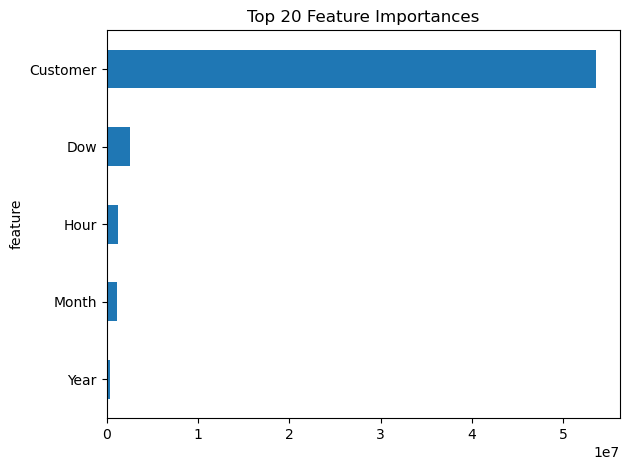

In [ ]:
# Assuming your model is named 'model' and has been fitted
importance = model.feature_importance(importance_type="gain")
features = model.feature_name()

# Create DataFrame
feat_df = pd.DataFrame({"feature": features, "importance": importance}).sort_values(
    by="importance", ascending=False
)

# Plot top 20
feat_df.head(20).plot(kind="barh", x="feature", y="importance", legend=False)
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
X_train

,Hour,Month,Year,Dow,Customer
DateTime,,,,,
2022-01-01 00:00:00,0,1,2022,5,IT_1
2022-01-01 00:00:00,0,1,2022,5,IT_123
2022-01-01 00:00:00,0,1,2022,5,IT_2001
2022-01-01 00:00:00,0,1,2022,5,IT_1998
2022-01-01 00:00:00,0,1,2022,5,IT_1995
...,...,...,...,...,...
2024-06-30 23:00:00,23,6,2024,6,IT_2569
2024-06-30 23:00:00,23,6,2024,6,IT_863
2024-06-30 23:00:00,23,6,2024,6,IT_1962


In [ ]:
X_test

,Hour,Month,Year,Dow,Customer
DateTime,,,,,
2024-07-01 00:00:00,0,7,2024,0,IT_889
2024-07-01 00:00:00,0,7,2024,0,IT_534
2024-07-01 00:00:00,0,7,2024,0,IT_305
2024-07-01 00:00:00,0,7,2024,0,IT_1066
2024-07-01 00:00:00,0,7,2024,0,IT_2656
...,...,...,...,...,...
2024-08-31 23:00:00,23,8,2024,5,IT_2048
2024-08-31 23:00:00,23,8,2024,5,IT_2049
2024-08-31 23:00:00,23,8,2024,5,IT_2050


In [ ]:
y_test_modified = y_test.fillna(0).to_numpy()
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

rmse = mean_squared_error(y_test_modified, y_pred)
print(f"RMSE: {rmse}")

RMSE: 0.019994654440524732


In [ ]:
X_train.dtypes

Hour           int64
Month          int64
Year           int64
Dow            int64
Customer    category
dtype: object

In [ ]:
true = true[true.index >= date]

true

,Customer,Consumption
DateTime,,
2024-07-01 00:00:00,IT_889,0.241650
2024-07-01 00:00:00,IT_534,0.030900
2024-07-01 00:00:00,IT_305,0.046950
2024-07-01 00:00:00,IT_1066,0.198369
2024-07-01 00:00:00,IT_2656,0.000856
...,...,...
2024-08-31 23:00:00,IT_2048,0.007467
2024-08-31 23:00:00,IT_2049,0.001369
2024-08-31 23:00:00,IT_2050,0.002254


In [ ]:
pivoted_true = true.pivot(columns="Customer", values="Consumption")
pivoted_true.head()

Customer,ES_1,ES_100,ES_104,ES_107,ES_109,ES_11,ES_114,ES_115,ES_117,ES_126,...,IT_982,IT_984,IT_985,IT_987,IT_988,IT_991,IT_992,IT_995,IT_996,IT_998
DateTime,,,,,,,,,,,,,,,,,,,,,
2024-07-01 00:00:00,0.001040,0.030804,0.022380,0.013556,0.054,0.015900,3.962,0.221,0.023,0.002100,...,0.000024,0.001250,0.001850,0.000076,0.005225,0.000896,0.002075,0.003724,0.000514,0.001150
2024-07-01 01:00:00,0.000940,0.028396,0.022268,0.011736,0.057,0.015936,4.231,0.238,0.026,0.002472,...,0.000024,0.001458,0.001975,0.000076,0.005075,0.000896,0.002075,0.003750,0.000510,0.001175
2024-07-01 02:00:00,0.000948,0.027264,0.021696,0.011896,0.054,0.016892,4.306,0.228,0.026,0.001580,...,0.000024,0.001382,0.001825,0.000076,0.005250,0.000896,0.002125,0.003750,0.000513,0.001175
2024-07-01 03:00:00,0.001084,0.027984,0.022368,0.016124,0.054,0.015104,4.122,0.219,0.022,0.002496,...,0.000024,0.001058,0.001875,0.000076,0.005125,0.000896,0.002300,0.003700,0.000485,0.001175
2024-07-01 04:00:00,0.000832,0.031076,0.021436,0.014236,0.053,0.035684,4.206,0.211,0.042,0.003068,...,0.000024,0.001352,0.001950,0.000076,0.005250,0.000896,0.002550,0.003775,0.000536,0.001150


In [ ]:
it_df_true = pivoted_true.filter(like="IT_", axis=1)
es_df_true = pivoted_true.filter(like="ES_", axis=1)
it_df_true.head()

Customer,IT_1,IT_100,IT_1002,IT_1007,IT_1008,IT_1009,IT_101,IT_1010,IT_1011,IT_1012,...,IT_982,IT_984,IT_985,IT_987,IT_988,IT_991,IT_992,IT_995,IT_996,IT_998
DateTime,,,,,,,,,,,,,,,,,,,,,
2024-07-01 00:00:00,0.001842,0.086516,0.000675,0.000012,0.0,0.001228,0.018,0.001248,0.024578,0.010799,...,0.000024,0.001250,0.001850,0.000076,0.005225,0.000896,0.002075,0.003724,0.000514,0.001150
2024-07-01 01:00:00,0.001901,0.083981,0.000700,0.000013,0.0,0.001228,0.015,0.001250,0.025183,0.010950,...,0.000024,0.001458,0.001975,0.000076,0.005075,0.000896,0.002075,0.003750,0.000510,0.001175
2024-07-01 02:00:00,0.001853,0.084220,0.000700,0.000012,0.0,0.001228,0.018,0.001252,0.003412,0.010800,...,0.000024,0.001382,0.001825,0.000076,0.005250,0.000896,0.002125,0.003750,0.000513,0.001175
2024-07-01 03:00:00,0.001917,0.084437,0.000675,0.000012,0.0,0.001228,0.021,0.001254,0.003431,0.010950,...,0.000024,0.001058,0.001875,0.000076,0.005125,0.000896,0.002300,0.003700,0.000485,0.001175
2024-07-01 04:00:00,0.001853,0.079521,0.000700,0.000014,0.0,0.001228,0.021,0.001258,0.003402,0.011100,...,0.000024,0.001352,0.001950,0.000076,0.005250,0.000896,0.002550,0.003775,0.000536,0.001150


In [ ]:
pred = pd.DataFrame(y_pred, index=true.index, columns=["Consumption"])
pred["name"] = X_test["Customer"]
pred

,Consumption,name
DateTime,,
2024-07-01 00:00:00,0.208968,IT_889
2024-07-01 00:00:00,0.070985,IT_534
2024-07-01 00:00:00,0.051807,IT_305
2024-07-01 00:00:00,0.303004,IT_1066
2024-07-01 00:00:00,-0.004373,IT_2656
...,...,...
2024-08-31 23:00:00,-0.008546,IT_2048
2024-08-31 23:00:00,-0.009410,IT_2049
2024-08-31 23:00:00,-0.009503,IT_2050


In [ ]:
pivoted_pred = pred.pivot(columns="name", values="Consumption")
pivoted_pred.head()

name,ES_1,ES_100,ES_104,ES_107,ES_109,ES_11,ES_114,ES_115,ES_117,ES_126,...,IT_982,IT_984,IT_985,IT_987,IT_988,IT_991,IT_992,IT_995,IT_996,IT_998
DateTime,,,,,,,,,,,,,,,,,,,,,
2024-07-01 00:00:00,0.001550,0.018956,0.034609,0.009117,0.061192,0.019960,4.030114,0.293753,0.022756,0.001120,...,-0.003599,-0.003629,0.023197,-0.003752,0.024104,-0.003027,-0.000126,0.003019,-0.002000,0.002322
2024-07-01 01:00:00,0.001291,0.018697,0.034351,0.008858,0.060933,0.019701,4.056948,0.294231,0.022497,0.000861,...,-0.003858,-0.003888,0.022938,-0.004011,0.023846,-0.003286,-0.000385,0.002760,-0.002259,0.002063
2024-07-01 02:00:00,0.001291,0.018697,0.034351,0.008858,0.060933,0.019701,4.051636,0.294231,0.022497,0.000861,...,-0.003858,-0.003888,0.022938,-0.004011,0.023846,-0.003286,-0.000385,0.002760,-0.002259,0.002063
2024-07-01 03:00:00,0.001291,0.018697,0.034351,0.008858,0.060933,0.019701,4.052231,0.294231,0.022497,0.000861,...,-0.003858,-0.003888,0.022938,-0.004011,0.023846,-0.003286,-0.000385,0.002760,-0.002259,0.002063
2024-07-01 04:00:00,0.000455,0.017696,0.033306,0.008220,0.059871,0.018674,4.024252,0.304833,0.021434,-0.001082,...,-0.004849,-0.004782,0.021997,-0.004677,0.028502,-0.004392,-0.001107,0.001969,-0.003159,0.001248


In [ ]:
it_df_pred = pivoted_pred.filter(like="IT_", axis=1)
es_df_pred = pivoted_pred.filter(like="ES_", axis=1)

In [ ]:
mask_it = X_test["Customer"].apply(lambda x: x.startswith("IT_"))
mask_es = X_test["Customer"].apply(lambda x: x.startswith("ES_"))
mask_it

DateTime
2024-07-01 00:00:00     True
2024-07-01 00:00:00     True
2024-07-01 00:00:00     True
2024-07-01 00:00:00     True
2024-07-01 00:00:00     True
                       ...  
2024-08-31 23:00:00     True
2024-08-31 23:00:00     True
2024-08-31 23:00:00     True
2024-08-31 23:00:00     True
2024-08-31 23:00:00    False
Name: Customer, Length: 2669472, dtype: bool

In [ ]:
pred_it = y_pred[mask_it]
pred_es = y_pred[mask_es]
true_it = y_test[mask_it]
true_es = y_test[mask_es]

In [ ]:
print("Shape of pred_it:", y_pred.shape)
print("Shape of true_it:", y_test.shape)

Shape of pred_it: (2669472,)
Shape of true_it: (2669472, 1)


In [ ]:
pd.isna(it_df_true).sum().sum()

np.int64(0)

In [ ]:
evaluate(pred_it=it_df_pred, true_it=it_df_true, pred_es=es_df_pred, true_es=es_df_true)


                 FORECAST EVALUATION REPORT                 

IT PERFORMANCE
------------------------------------------------------------

Metric                  Score  Weight  Weighted Score
Absolute Error   93355.874997     1.0    93355.874997
Portfolio Error  15782.874815    10.0   157828.748145

Top 3 consumers with highest error in Italy:

name
IT_506     2079.04
IT_1689    1487.80
IT_505     1410.10

ES PERFORMANCE
------------------------------------------------------------

Metric                  Score  Weight  Weighted Score
Absolute Error   13424.342524     5.0    67121.712620
Portfolio Error   3524.331412    50.0   176216.570588

Top 3 consumers with highest error in Spain:

name
ES_72     1728.53
ES_70     1561.40
ES_114     821.74

------------------------------------------------------------
                    TOTAL FORECAST SCORE                    
                           494523                           
-----------------------------------------------------------